Q1

In [1]:
%pylab inline
from scipy.stats import *
import scipy.stats as stats
from datetime import date

Populating the interactive namespace from numpy and matplotlib


In [2]:
def L(x,m,b):
    return m*x+b
def rxy(x,y):
    return sum((x-mx)*(y-my))/(std(x,ddof=1)*std(y,ddof=1)*(n-1))
def Syx (y,Z):
    return (sum((y-Z)**2)/(n-2))**0.5
def w(r):
    return (n-3)**0.5/2*log((1+r)/(1-r))

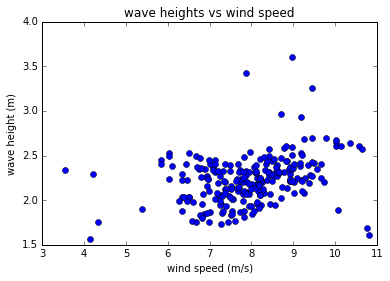

In [3]:
#Q2(a)
arr=genfromtxt("WindWaveData.txt")
x=arr[:,0]
y=arr[:,1]
plt.plot(x,y,'bo')
plt.xlabel('wind speed (m/s)')
plt.ylabel('wave height (m)')
plt.title('wave heights vs wind speed')
n = len(x)1
mx=mean(x)
my=mean(y)

From the plot, we can see there is a weak linear relationship.

In [4]:
r=rxy(x,y)
print 'the correlation coefficient is:',r
print  w(r)

the correlation coefficient is: 0.320624447938
5.0838695607


the correlation coefficient is  0.32, $\frac{\mu_w}{\sigma_w}$=5.08>1.97, 
which means this correlation is at 95% confidence level

In [5]:
b=(sum(x*y)-len(x)*mean(x)*mean(y))/(sum(x**2)-len(x)*mean(x)**2)
print 'the slope is:',b
a=mean(y)-b*mean(x)
print 'the intersect is:',a
Z=a+b*x
st=stats.t.interval(0.95,n-2)
print 'the 95% confidence intervel is:',st       #student distribution
t=st[1]
s=Syx(y,Z)
print 'the t value is:',t 
print 'Sy|x is:',s

the slope is: 0.0763178042687
the intersect is: 1.62538674518
the 95% confidence intervel is: (-1.9701100622670771, 1.9701100622670771)
the t value is: 1.97011006227
Sy|x is: 0.258426962346


In [6]:
ub= s*t/(sum((x-mx)**2))**0.5
ua= s*t*(1/n+(mean(x))**2/sum((x-mx)**2))**0.5
print 'the uncertainty of slope is:',ub
print 'the uncertainty of intersection is:',ua

the uncertainty of slope is: 0.0289754649668
the uncertainty of intersection is: 0.229905032093


the slope is 0.076 $\pm$ 0.029

the intersect is 1.63 $\pm$0.23

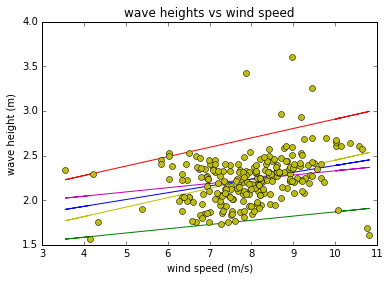

In [7]:
Zpab=a+ua+(b+ub)*x
Zpamb=a+ua+(b-ub)*x
Zmapb=a-ua+(b+ub)*x
Zmab=a-ua+(b-ub)*x
plt.plot(x,Zpab,'r-')  # +a+b uncertainty
plt.plot(x,Zpamb,'m-') # +a-b uncertainty
plt.plot(x,Zmapb,'y-') # -a+b uncertainty
plt.plot(x,Zmab,'g-')  # -a-b uncertainty
plt.plot(x,Z, 'b-')    # regression line
plt.plot(x,y,'yo')
plt.xlabel('wind speed (m/s)')
plt.ylabel('wave height (m)')
plt.title('wave heights vs wind speed')

the slope is 0.076 $\pm$ 0.029

the intersect is 1.63 

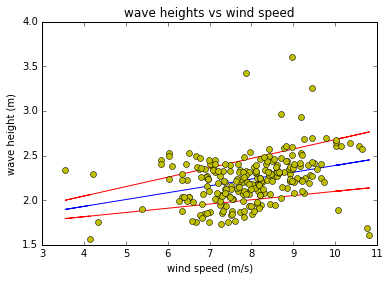

In [8]:
Zp=a+(b+ub)*x
Zm=a+(b-ub)*x
plt.plot(x,Zp, 'r-') # +uncertainty
plt.plot(x,Zm, 'r-') # -uncertainty
plt.plot(x,Z, 'b-')  #regression line
plt.plot(x,y,'yo')
plt.xlabel('wind speed (m/s)')
plt.ylabel('wave height (m)')
plt.title('wave heights vs wind speed')

In [9]:
yexp=a+b*10
yexp_range=[round(a+(b-ub)*10,3),round(a+(b+ub)*10,3)]
print 'the expectation value of yexp is:',yexp
print 'the expected range is:',yexp_range

the expectation value of yexp is: 2.38856478786
the expected range is: [2.099, 2.678]


Based on the analysis, the expected range of wave heights is [2.099, 2.678] m

Q2

In [10]:
arr=genfromtxt("UVicSci_temperature.txt") 

In [11]:
arr1=genfromtxt("AllStations_temperature_h.txt")
n=len(arr1[0,0:])
for i in range(n):
    if arr1[0,i]==236.6910 and arr1[1,i]==48.4623: # to find the UvicSci in allstation data(2d-array)
        m=i
        print m
    else:
        pass
data=arr1[2:,m]

33


In [12]:
tt_start = arr[0] -(7.0/24)  # starting time; convert UTC to local time
tt_end   = arr[1] -(7.0/24)  # end time

In [13]:
from datetime import date
day1start=date.toordinal(date(2015,8,7))+366 # python decimal time string shifts 366 days
day2start=date.toordinal(date(2017,8,7))+366
print day1start
print day2start

736183
736914


In [14]:
tt1_start=arr1[2,0]                        # python array starts from 0
dayhr=24                                   # length of a day in hour resolution
daymin=24*60
m1_start=int(3+(day1start-tt_start)*daymin)  
m1_end=int(m1_start+daymin)      
m2_start=int(3+(day2start-tt_start)*daymin) 
m2_end=int(m2_start+daymin) 

h1_start=int(2+(day1start-tt1_start)*dayhr)  
h1_end=int(h1_start+dayhr)      
h2_start=int(2+(day2start-tt1_start)*dayhr) 
h2_end=int(h2_start+dayhr)  

the 95% confidence intervel is: (-1.9616139038560372, 1.9616139038560372)
the t value is: 1.96161390386


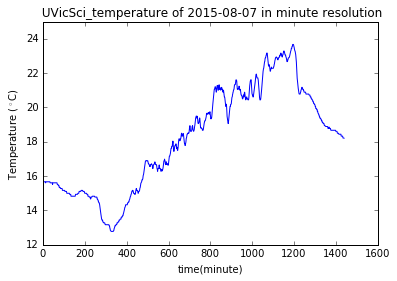

the average temperature of 2015-08-07 in minute resolution is:18.1357152778°C
the standard deviation of 2015-08-07 is : 2.98937391481
the mean value of 2015-08-07 in minute resolution is : 18.14 +/- 0.155


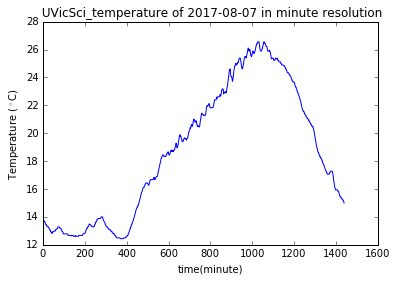

the average temperature of 2017-08-07 in minute resolution is:18.6687986111°C
the standard deviation of 2017-08-07 in minute resolution is : 4.72625523525
the mean value of 2017-08-07 in minute resolution is : 18.67 +/- 0.244
the mean temperature difference is: 0.53 +/- 0.289, which is greater than 0


In [15]:
st=stats.t.interval(0.95,daymin-1)
print 'the 95% confidence intervel is:',st       #student distribution
t=st[1]
s=Syx(y,Z)
print 'the t value is:',t 
figure(1)
mx1 = linspace(0,daymin-1,daymin)
my1 = arr[m1_start:m1_end]
plot(mx1,my1)
title(' UVicSci_temperature of 2015-08-07 in minute resolution')
xlabel('time(minute)')
ylabel('Temperature ($^\circ$C)')
ylim(12,25)
show()
sm1=std(my1,ddof=1)
um1=sm1*t/daymin**0.5
print 'the average temperature of 2015-08-07 in minute resolution is:%s°C' %mean(my1) 
print 'the standard deviation of 2015-08-07 is :',sm1
print 'the mean value of 2015-08-07 in minute resolution is : %s +/- %s' %(round(mean(my1),2),round(um1,3))
figure(2)
mx2 = linspace(0,daymin-1,daymin)
my2 = arr[m2_start:m2_end]
plot(mx2,my2)
title(' UVicSci_temperature of 2017-08-07 in minute resolution')
xlabel('time(minute)')
ylabel('Temperature ($^\circ$C)')
show()
sm2=std(my2,ddof=1)
um2=sm2*t/daymin**0.5
print 'the average temperature of 2017-08-07 in minute resolution is:%s°C' %mean(my2) 
print 'the standard deviation of 2017-08-07 in minute resolution is :',std(my2,ddof=1)
print 'the mean value of 2017-08-07 in minute resolution is : %s +/- %s' %(round(mean(my2),2),round(um2,3))

dm=round(mean(my2),2)-round(mean(my1),2)
udm=round((round(um2,3)**2+round(um1,3)**2)**0.5,3)
print 'the mean temperature difference is: %s +/- %s, which is greater than 0'%(dm,udm)

the 95% confidence intervel is: (-2.0686576104190406, 2.0686576104190406)
the t value is: 2.06865761042


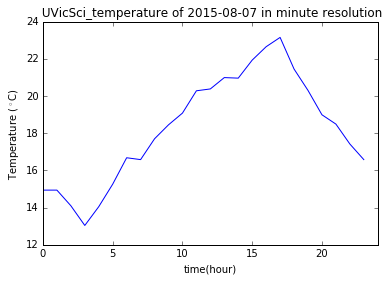

the average temperature of 2015-08-07 in hour resolution is:18.26625°C
the standard deviation of 2015-08-07 in hour resolutionis : 2.93468880285
the mean value of 2015-08-07 in minute resolution is : 18.266 +/- 1.239


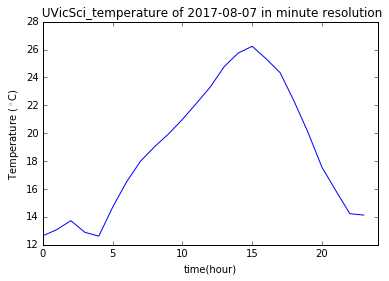

the average temperature of 2017-08-07 in hour resolution is:18.7591666667°C
the standard deviation of 2017-08-07 in hour resolution is : 4.70316259615
the mean value of 2017-08-07 in minute resolution is : 18.759 +/- 1.986
the mean temperature difference is: 0.49 +/- 2.341, which can be smaller than 0


In [17]:
st=stats.t.interval(0.95,dayhr-1)
print 'the 95% confidence intervel is:',st       #student distribution
t=st[1]
s=Syx(y,Z)
print 'the t value is:',t 
figure(1)
hx1 = linspace(0,dayhr-1,dayhr)
hy1 = data[h1_start:h1_end]
plot(hx1,hy1)
title(' UVicSci_temperature of 2015-08-07 in minute resolution')
xlabel('time(hour)')
ylabel('Temperature ($^\circ$C)')
xlim(0,24)
show()
sh1=std(hy1,ddof=1)
uh1=sh1*t/dayhr**0.5
print 'the average temperature of 2015-08-07 in hour resolution is:%s°C' %mean(hy1) 
print 'the standard deviation of 2015-08-07 in hour resolutionis :',std(hy1,ddof=1)
print 'the mean value of 2015-08-07 in minute resolution is : %s +/- %s' %(round(mean(hy1),3),round(uh1,3))

figure(2)
hx2 = linspace(0,dayhr-1,dayhr)
hy2 = data[h2_start:h2_end]
plot(hx2,hy2)
title(' UVicSci_temperature of 2017-08-07 in minute resolution')
xlabel('time(hour)')
ylabel('Temperature ($^\circ$C)')
xlim(0,24)
show()
sh2=std(hy2,ddof=1)
uh2=sh2*t/dayhr**0.5
print 'the average temperature of 2017-08-07 in hour resolution is:%s°C' %mean(hy2) 
print 'the standard deviation of 2017-08-07 in hour resolution is :',std(hy2,ddof=1)
print 'the mean value of 2017-08-07 in minute resolution is : %s +/- %s' %(round(mean(hy2),3),round(uh2,3))

dh=round(mean(hy2),2)-round(mean(hy1),2)
udh=round((round(uh2,3)**2+round(uh1,3)**2)**0.5,3)
print 'the mean temperature difference is: %s +/- %s, which can be smaller than 0'%(dh,udh)

Based on the analysis of the mean temperature of minute resolution, we can conclude that the mean tempreature of 2017-08-07 is higher than 2015-08-07, August 7th in 2017 is warmer than 2015 at 95% confidence level, however, for hour resolution the answer is no.

uncertatinty calculation reference:

$f=f(x,y)$


${\sigma_{f}}^2={(\frac{\partial f}{\partial x})}^2{\sigma_x}^2 +{(\frac{\partial f}{\partial y})}^2{\sigma_y}^2
$

C=A+B

${\sigma_{C}}^2={\sigma_A}^2 +{\sigma_B}^2$

$\sigma_{C}=\sqrt{{\sigma_A}^2 +{\sigma_B}^2}$

$(a\pm \delta a) -(b\pm\delta b)=a-b\pm\sqrt{(\delta a)^2+(\delta b)^2}$


Q3.1

x,y are independent

for xy

the mean value is:

 $\displaystyle {\begin{aligned}E[xy]&=\iint \limits_{-\infty}^{\infty}p(x,y) xydxdy=\iint \limits_{-\infty}^{\infty}p(x)p(y)xydxdy\\[8pt]&=\int_{-\infty}^{\infty} xp(x)dx \int_{-\infty}^{\infty} yp(y)dy\\[8pt]&=E[x]E[y]=\mu_{x} \mu_{y}\end{aligned}}$



for x-y

$var(x-y) = E[(x-y)^2]-(E[x-y])^2$

$var(x-y)= E[x^2]+E[y^2]-2E[xy] +2E[x]E[y]-E[x^2]-E[y]^2$

$var(x-y)= E[x^2]+E[y^2]-2E[x]E[y] +2E[x]E[y]-E[x^2]-E[y]^2$
    
$var(x-y)= E[x^2]-E[x]^2 + E[y^2]-E[y]^2$
        
$var(x-y)= var(x)+var(y)$
            
$var(x-y)= \sigma_x^2 + \sigma_y^2$

$\\$

Q3.2

$a_i=A_i+\delta_i    \qquad          b_i=B_{i}+\varepsilon_{i} $

$\\$
$\delta_i,\varepsilon_i$ and are independent of each other and are independent of the random variables $A_i,B_i$

$\\$
$r_{AB}=\frac{S_{AB}}{S_AS_B} \qquad r_{ab}=\frac{S_{ab}}{S_aS_b}$

$\\$
$\displaystyle {\begin{aligned}(N-1)S_{ab} &=\sum_{i}a_ib_i-N\bar{a}\bar{b}\\[8pt]&=\sum_{i}(A_i+\delta_i)(B_{i}+\varepsilon_{i})-N(\bar{A}+\bar{\delta})(\bar{B}+\bar{\varepsilon})\\[8pt]&=(\sum_{i}A_iB_i-N\bar{A}\bar{B})+(\sum_{i}A_i\varepsilon_{i}-N\bar{A}\bar{\varepsilon})+(\sum_{i}B_i\delta_i-N\bar{B}\bar{\varepsilon})+(\sum_{i}\delta_i\varepsilon_i-N\bar{\delta}\bar{\varepsilon})\end{aligned}}$

because of the independence, $S_{A\epsilon},S_{B\delta},S_{{\delta\epsilon}}$ are equal to zero
$\\$

$\displaystyle {(N-1)S_{ab} =\sum_{i}A_iB_i-N\bar{A}\bar{B}=(N-1)S_{AB}}$
$\\$

$S_{ab}=S_{AB}$
$\\$

$\displaystyle {\begin{aligned}(N-1){S_a}^2&=\sum_{i}{a_i}^2-N{\bar{a}}^2\\[8pt]&=\sum_{i}{(A_i+\delta_i)}^2-N{(\bar{A}+\bar{\delta})}^2\\[8pt]&=(\sum_{i}{A_i}^2-N{\bar{A}}^2)+(\sum_{i}{\delta_i}^2-N{\bar{\delta}}^2)+2(\sum_{i}A_i\delta_i-N\bar{A}\bar{\delta})\\[8pt]&=(N-1)({S_A}^2+{S_\delta}^2)\end{aligned}}$
$\\$

$S_a=\sqrt{{S_A}^2+{S_\delta}^2}$
$\\$

same analysis for $S_b$
$\\$

$S_b=\sqrt{({S_B}^2+{S_\varepsilon}^2)}$
$\\$

$\displaystyle {\begin{aligned}r_{ab}&=\frac{S_{AB}}{S_aS_b}\\[8pt]&=\frac{S_{AB}}{\sqrt{({S_A}^2+{S_\delta}^2)({S_B}^2+{S_\varepsilon}^2)}}\\[8pt]&=\frac{S_{AB}}{S_AS_B}\frac{1}{\sqrt{1+\frac{{S_\varepsilon}^2}{{S_B}^2}+\frac{{S_\delta}^2}{{S_A}^2}+\frac{ {S_{\delta}}^2{S_{\varepsilon}}^2}{{S_A}^2{S_B}^2}}}\\[8pt]&=\alpha r_{AB}\end{aligned}}$
$\\$

$\alpha=\frac{1}{\sqrt{1+\frac{{S_\varepsilon}^2}{{S_B}^2}+\frac{{S_\delta}^2}{{S_A}^2}+\frac{ {S_{\delta}}^2{S_{\varepsilon}}^2}{{S_A}^2{S_B}^2}}}$
$\\$

$\alpha\leqslant1$,if $\alpha=1, r_{ab}=r_{AB},$ the error does not affect the correlation coefficient;if $\alpha<1$,the correlation coefficient is smaller, which means the linear relationship is weaker

$\\$

Q3.3

$R_{xy} (-\tau)=E[ x_k (t)  y_k (t-\tau)]$

let  $t = t +\tau$

$R_{xy} (-\tau) = E[ x_k (t+\tau)y_k (t+\tau-\tau)]$

$R_{xy} (-\tau) = E[y_k (t)x_k (t+\tau)]$

$R_{yx} (\tau) = E[y_k (t) x_k (t+\tau)]$   by definition

$R_{xy} (-\tau) = R_{yx} (\tau)$

$\\$

To prove $|R_{xy}(\tau)|^2\leqslant R_{xx}(0)R_{yy}(0) $
$\\$

for any real constants a and b, the expectation value is

$\\$
$E[(ax(t)+by(t+\tau))^2]\geqslant0$

$a^2R_{xx}(0)+2abR_{xy}(\tau)+b^2R_{yy}(0)\geqslant0$

assume b $\ne 0$

$(\frac{a}{b})^2R_{xx}(0)+2(\frac{a}{b})R_{xy}(\tau)+R_{yy}(0)\geqslant0$

This is a quadratic equation in a/b without real different roots since
one side is nonnegative. Therefore, the discriminant of this quadratic
equation in a/b must be nonpositive.

Discriminant $= 4R_{xy}^2(\tau)-4R_{xx}(0)R_{yy}(0)\leqslant0$

$R_{xy}(\tau)^2=|R_{xy}(\tau)|^2\leqslant R_{xx}(0)R_{yy}(0) $



        

